<a href="https://colab.research.google.com/github/Brian-Lam/Generative-Deep-Learning/blob/main/Generative_Deep_Learning_Chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras import datasets, utils

# In this case, x is the features (images from the dataset), and
# y is the classification label. x_train is particularly interesting,
# it is a tensor (multi dimensional array) of shape [50,000, 32, 32, 3]:
#
# - 50,000 images
# - 32 pixels x 32 pixels
# - 3 channels per pixel (RGB)
# - Each channel has a value from 0 to 255
#
# The value of each dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
# CIFAR-10 dataset contains 10 classifications
NUM_CLASSES = 10

# Normalize the RGB values into values between 0 and 1, by dividing them by 255.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Create one-hot encodings for the labels.
y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

# Build an MLP - Multi Layer Perceptron
#
# For context, a neural network consists of series of stacked layers. Neural
# networks where adjacent layers are fully connected are called multilayer
# perceptrons.
#
# This MLP will classify an image. Note that it is a discriminative (not
# generative) model that uses supervised learning.

from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(200, activation = 'relu'),
    layers.Dense(150, activation = 'relu'),
    layers.Dense (10, activation = 'softmax')
])

print (model.summary())

# Define the optimizer and loss function
from tensorflow.keras import optimizers

# Optimizers are used to update the weights in neural networks, based on the
# gradient of the loss function. Adam (Adapative moment estimation) is a common
# optimizer.
#
# The learning rate is the most common tweak for the Adam optimizer, it affects
# how aggressively we change the weights during each training step. A higher
# learning rate could mean faster training, but a less stable training.
opt = optimizers.Adam(learning_rate = 0.0005)
# There are multiple types of loss functions - your choice of loss function will
# be affected byr the type of problem you are trying to solve. For example, if
# you are trying to solve a regression problem (with a continuous output), a
# mean squared error loss function may be used.
#
# In this case, we are trying to solve a classification problem (classifying
# images with a predefined set of labels), so a categorical cross-entropy loss
# function would be more appropriate.
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# Train the model across 10 epochs, with a batch size of 32. An epoch represents
# a complete pass through the entire training dataset, while a batch is a subset
# of the training data used to compute a single gradient update. In other words,
# an epoch consists of multiple batches.
#
# The batch size param affects how many images are processed in each batch.
# The epochs param determines how many times the network will process
# the training data (and errors are backpropagated, updating the weights to
# improve the model).
model.fit(x_train,
          y_train,
          batch_size = 32,
          epochs = 10,
          shuffle = True)

# We can use model.evaluate() to evaluate the accuracy of the trained model
# on our test dataset.
model.evaluate(x_test, y_test)

CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

# This will be an array of shape [10000, 10]:
#   10,000 observations
#   10 classification possibilities per observation
predictions = model.predict(x_test)

# We then convert this array of probabilities (one-hot encodings) back into
# a single prediction. The `axis = -1` parameter collapses the array over the
# last dimension (the classes dimension), so the final shape is [10,000, 1]
preds_single = CLASSES[np.argmax(predictions, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.2893 - loss: 1.9593
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.3903 - loss: 1.6927
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4298 - loss: 1.5906
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4553 - loss: 1.5290
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.4676 - loss: 1.4899
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.4832 - loss: 1.4490
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4891 - loss: 1.4259
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4981 - loss: 1.4104
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5066 - loss: 1.3856
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5154 - loss: 1.3645
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4946 - loss: 1.4244
313/313 ━━━━━━━━━━━━━━━━━━━━ 

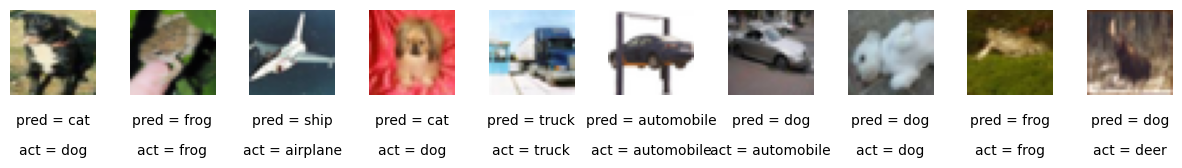

In [ ]:
import matplotlib.pyplot as plt

## Show the results
n_to_show = 10
indices = np.random.choice(range(0, len(x_test)), n_to_show)

fig = plt.figure(figsize = (15, 3))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize = 10, ha = 'center', transform = ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize = 10, ha = 'center', transform = ax.transAxes)
    ax.imshow(img)
